In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("customer.csv")
df


,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Profession,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Healthcare,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,Engineer,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Engineer,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,Lawyer,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Entertainment,Yes,Winter,United States
...,...,...,...,...,...,...,...,...,...,...,...
2000,1996,Female,22,Boots,Footwear,45,Express,Artist,Yes,Summer,United States
2001,1997,Female,22,Boots,Footwear,77,Free Shipping,Doctor,Yes,Summer,Brazil
2002,1998,Male,22,Boots,Footwear,50,Next Day Air,Healthcare,Yes,Summer,United States
2003,1999,Male,22,Boots,Footwear,25,Express,Executive,Yes,Summer,Brazil


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   CustomerID           2005 non-null   int64 
 1   Gender               2005 non-null   object
 2   Age                  2005 non-null   int64 
 3   Items Purchased      2005 non-null   object
 4   Category             2005 non-null   object
 5   Purchase Amount      2005 non-null   int64 
 6   Shipping Type        2005 non-null   object
 7   Profession           1970 non-null   object
 8   Subscription Status  2005 non-null   object
 9   Season               1976 non-null   object
 10  Country              2005 non-null   object
dtypes: int64(3), object(8)
memory usage: 172.4+ KB


In [6]:
df = pd.DataFrame(df)
df.head()
column_list = list(df.columns)
column_list
# Read all columns and checked their names to avoid errors during our work

['CustomerID',
 'Gender',
 'Age',
 'Items Purchased',
 'Category',
 'Purchase Amount',
 'Shipping Type',
 'Profession',
 'Subscription Status',
 'Season',
 'Country']

In [8]:
# dropping unnecessary columns
df.drop(columns="Profession", inplace= True)
df.head()

,CustomerID,Gender,Age,Items Purchased,Category,Purchase Amount,Shipping Type,Subscription Status,Season,Country
0,1,Male,18,Blouse,Clothing,50,Express,Yes,Spring,United States
1,2,Male,20,Sweater,Clothing,25,Free Shipping,No,Summer,United States
2,3,Female,35,Jeans,Clothing,15,Next Day Air,Yes,Fall,United States
3,4,Female,45,Sandals,Footwear,69,2-Day Shipping,No,Winter,United States
4,5,Female,60,Blouse,Clothing,85,2-Day Shipping,Yes,Winter,United States


In [9]:
df['Age Group'] = pd.cut(df['Age'], bins=[0, 18, 25, 35, 45, 55, 65, float('inf')], 
                         labels=['Under 18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'], 
                         include_lowest=True)

In [10]:
# checking for any N/A values
df.isna().sum()

CustomerID              0
Gender                  0
Age                     0
Items Purchased         0
Category                0
Purchase Amount         0
Shipping Type           0
Subscription Status     0
Season                 29
Country                 0
Age Group               0
dtype: int64

In [11]:
# dropping the N/A's in the profession column
df = df .dropna(subset=["Season"])

In [12]:
# check the column for the duplicates. we will check for duplicated customer IDs
df.duplicated('CustomerID').sum()

5

In [13]:
df.drop_duplicates(subset= 'CustomerID', inplace=True)
df.duplicated('CustomerID').sum()

0

In [14]:
df.duplicated('CustomerID').sum()

0

In [16]:
df.describe()

,CustomerID,Age,Purchase Amount
count,1971.000000,1971.000000,1971.000000
mean,1013.008625,29.548453,52.505835
std,572.332033,13.123082,29.340870
min,1.000000,18.000000,12.000000
25%,522.500000,22.000000,23.000000
50%,1015.000000,22.000000,50.000000
75%,1507.500000,33.000000,77.000000
max,2000.000000,74.000000,100.000000


Text(0.5, 1.0, 'customer Spending')

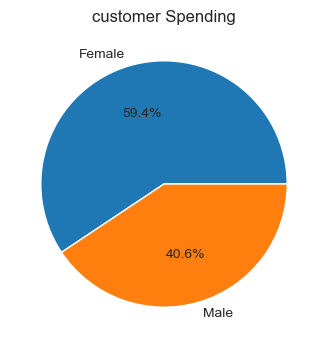

In [17]:
# Visualizations

sb.set_style('darkgrid')
plt.figure(figsize=(6,4))
plt.pie(df['Gender'].value_counts(), labels=df['Gender'].value_counts().index, autopct='%1.1f%%')
plt.title('customer Spending')

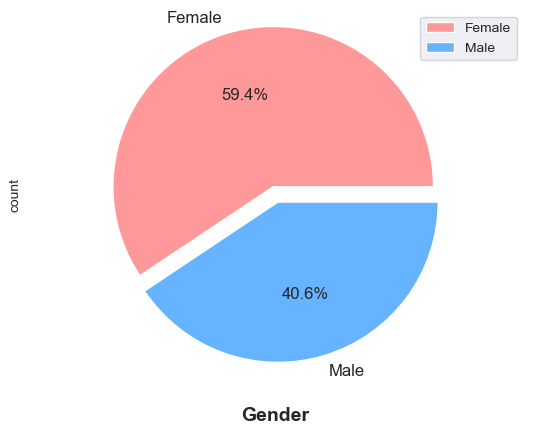

In [20]:
# Libraries for colors for visuals
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', 'lightcoral', 'lightskyblue', 'gold']

counts = df['Gender'].value_counts()
explode = (0, 0.1)

counts.plot(kind='pie', fontsize=12, explode=explode, autopct='%1.1f%%', colors=colors)
plt.xlabel('Gender', weight="bold", fontsize=14, labelpad=20)
plt.axis('equal')
plt.legend(labels=counts.index, loc="best")
plt.show()

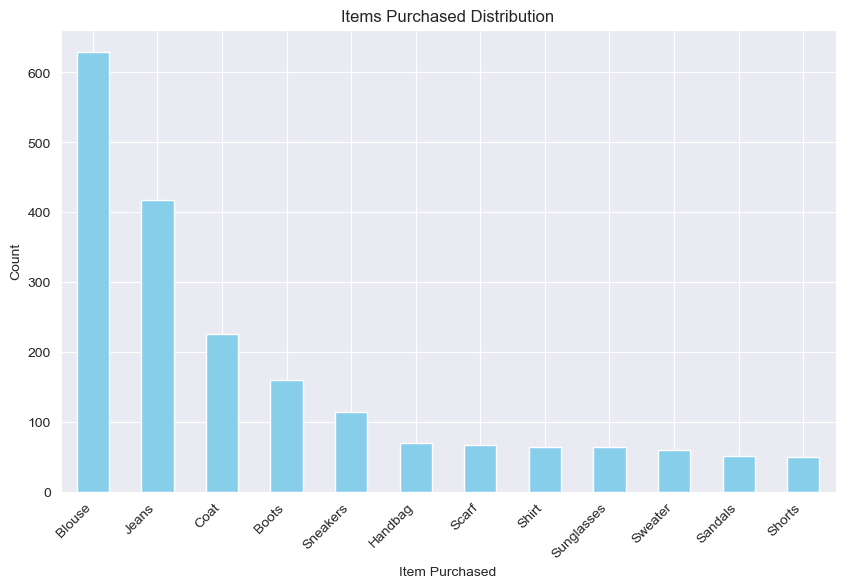

In [21]:
item_count = df['Items Purchased'].value_counts()

plt.figure(figsize=(10,6))
item_count.plot(kind='bar', color='skyblue')
plt.title('Items Purchased Distribution')
plt.xlabel('Item Purchased')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Footwear'),
  Text(2, 0, 'Outerwear'),
  Text(3, 0, 'Accessories')])

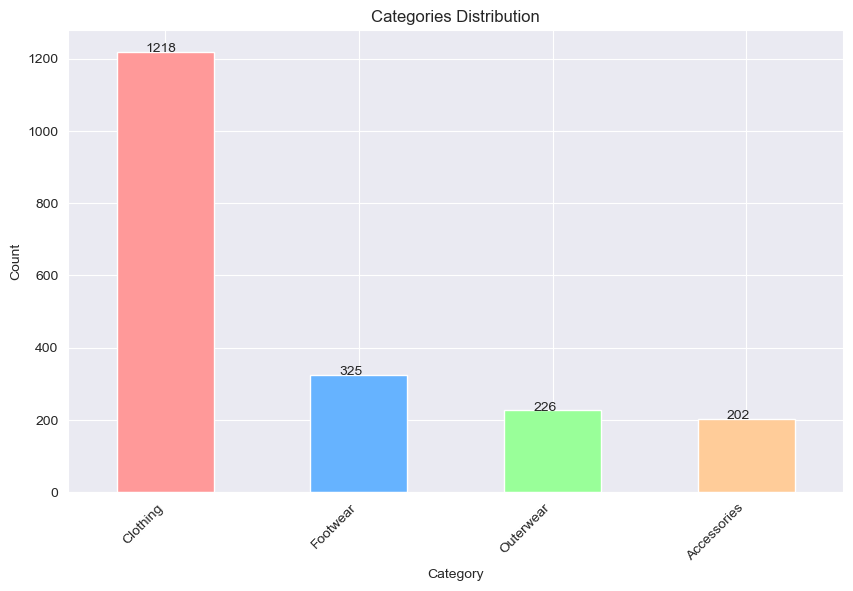

In [26]:
category_counts = df['Category'].value_counts()

plt.figure(figsize=(10,6))
bars = category_counts.plot(kind='bar', color=colors)
for bar, count in zip(bars.patches,category_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), fontsize=10)

plt.title('Categories Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

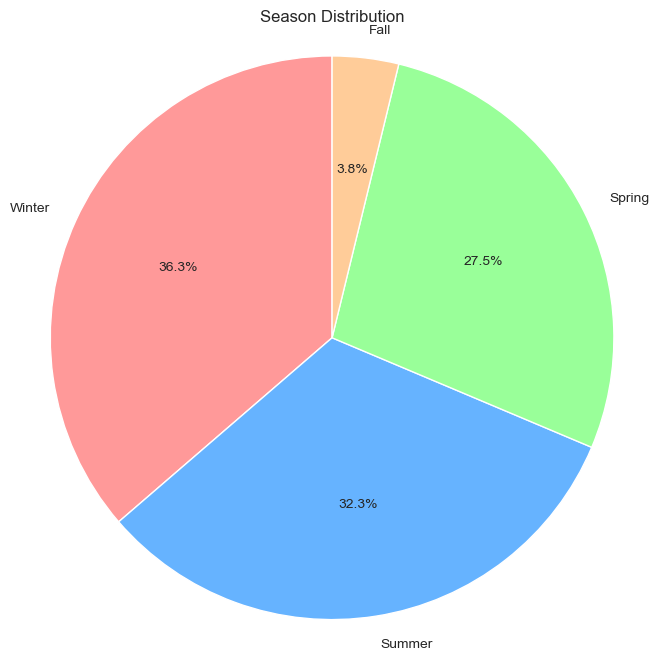

In [31]:
season_counts = df['Season'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(season_counts, labels= season_counts.index, autopct='%1.1f%%', colors= colors, startangle=90)
plt.title('Season Distribution')
plt.axis('equal')

plt.show()

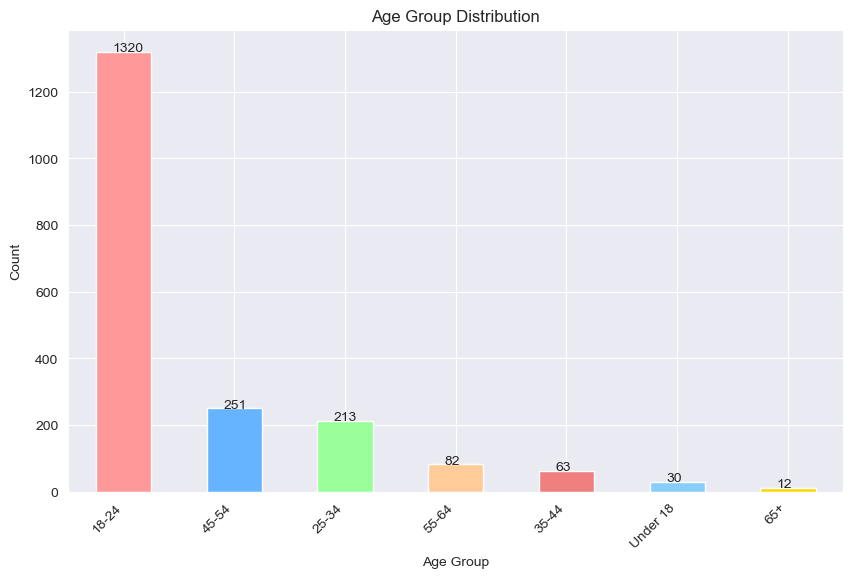

In [33]:
age_group_counts = df['Age Group'].value_counts()

plt.figure(figsize=(10,6))
bars= age_group_counts.plot(kind='bar', color= colors)

for bar, count in zip(bars.patches, age_group_counts):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.05, str(count), fontsize=10)

plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

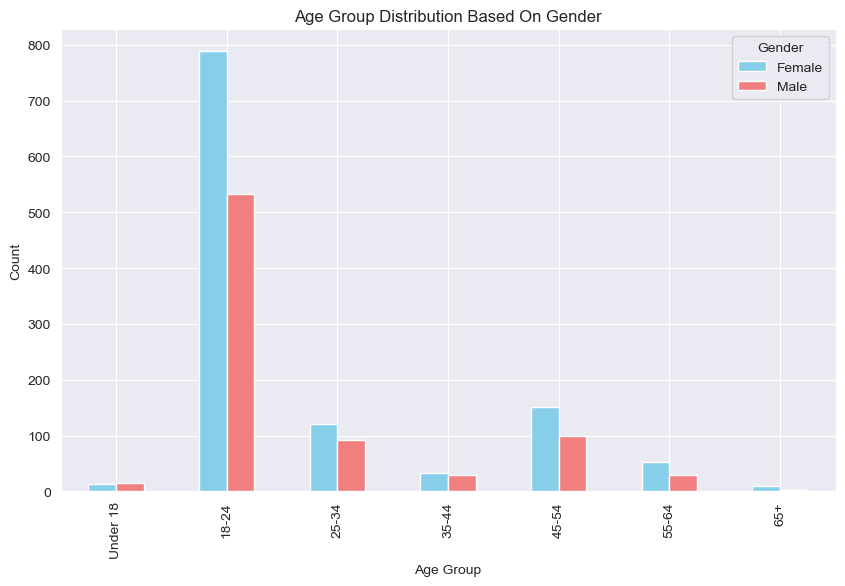

In [35]:
pivot_df = df.pivot_table(index= 'Age Group', columns='Gender', aggfunc='size', fill_value=0)

ax = pivot_df.plot(kind='bar', color=['skyblue', 'lightcoral'], figsize=(10,6))

ax.set_title('Age Group Distribution Based On Gender')
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.legend(title='Gender')

plt.show()